In [ ]:
#Import data manipulation libraries
import pandas as pd
import numpy as np
import math

import keras

#Import the visualization libraries
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Skripsi/Test Suhu/data-csv/test sensordht22.csv', index_col=0)
# df.drop(['z_count'], axis=1, inplace=True)
display(df.head())
original_df = df.copy(deep=True)
print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

,Ts,roomHumidity,roomTemperature,roomTempAC,tempOutside,z_count
_key,,,,,,
-N5j_PG2BumJh94SIecR,1656508228675,99.9,29.6,28.7,29.0,3
-N5jaYVnHHKXoN-igsIM,1656508528691,98.7,29.1,28.5,29.0,4
-N5jbgkFJcCvFCJyZseK,1656508828688,96.8,28.6,28.5,29.0,5
-N5jcq-5ysP6SyphOxAI,1656509128710,94.8,28.2,28.5,29.0,6
-N5jdzOHAHvvFCOXCw-f,1656509429331,93.8,27.9,28.0,29.0,7



Inference: The Datset consists of 6 features & 25 samples.


In [ ]:
df.tail(3)

,Ts,roomHumidity,roomTemperature,roomTempAC,tempOutside,z_count
_key,,,,,,
-N5jy_j_jqa6xQ8Bhzrv,1656514829285,80.7,26.5,27.0,28.6,25
-N5jziqxfa4Z8ChMb7hM,1656515128766,80.5,26.4,27.0,28.3,26
-N5k-soQJCMYgGzQd3Ab,1656515431708,80.4,26.3,27.0,28.3,27


In [ ]:
# df.drop(['Date'], axis=1, inplace=True)
def features_build(df):
    df["Date"] = pd.to_datetime(df["Ts"], unit='ms')
    df["Date"] = df['Date'].dt.tz_localize('UTC').dt.tz_convert('Asia/Jakarta')
    df["Date"] = df['Date'].dt.tz_localize(None)
features_build(df)
df

,Ts,roomHumidity,roomTemperature,roomTempAC,tempOutside,z_count,Date
_key,,,,,,,
-N5j_PG2BumJh94SIecR,1656508228675,99.9,29.6,28.7,29.0,3,2022-06-29 20:10:28.675
-N5jaYVnHHKXoN-igsIM,1656508528691,98.7,29.1,28.5,29.0,4,2022-06-29 20:15:28.691
-N5jbgkFJcCvFCJyZseK,1656508828688,96.8,28.6,28.5,29.0,5,2022-06-29 20:20:28.688
-N5jcq-5ysP6SyphOxAI,1656509128710,94.8,28.2,28.5,29.0,6,2022-06-29 20:25:28.710
-N5jdzOHAHvvFCOXCw-f,1656509429331,93.8,27.9,28.0,29.0,7,2022-06-29 20:30:29.331
-N5jf7crmWT9aM3j7gQ8,1656509729335,92.4,27.7,28.0,29.0,8,2022-06-29 20:35:29.335
-N5jgGiHHBDq4oEw-RHn,1656510028690,91.4,27.6,28.0,29.0,9,2022-06-29 20:40:28.690
-N5jhQE9qf0aoSr9Vd2T,1656510329803,90.3,27.5,27.5,29.0,10,2022-06-29 20:45:29.803
-N5jiZBuCcg1p2lsnPFu,1656510628667,88.8,27.4,27.5,29.0,11,2022-06-29 20:50:28.667


In [ ]:
df.set_index('Date', inplace=True)
df.head()

,Ts,roomHumidity,roomTemperature,roomTempAC,tempOutside,z_count
Date,,,,,,
2022-06-29 20:10:28.675,1656508228675,99.9,29.6,28.7,29.0,3
2022-06-29 20:15:28.691,1656508528691,98.7,29.1,28.5,29.0,4
2022-06-29 20:20:28.688,1656508828688,96.8,28.6,28.5,29.0,5
2022-06-29 20:25:28.710,1656509128710,94.8,28.2,28.5,29.0,6
2022-06-29 20:30:29.331,1656509429331,93.8,27.9,28.0,29.0,7


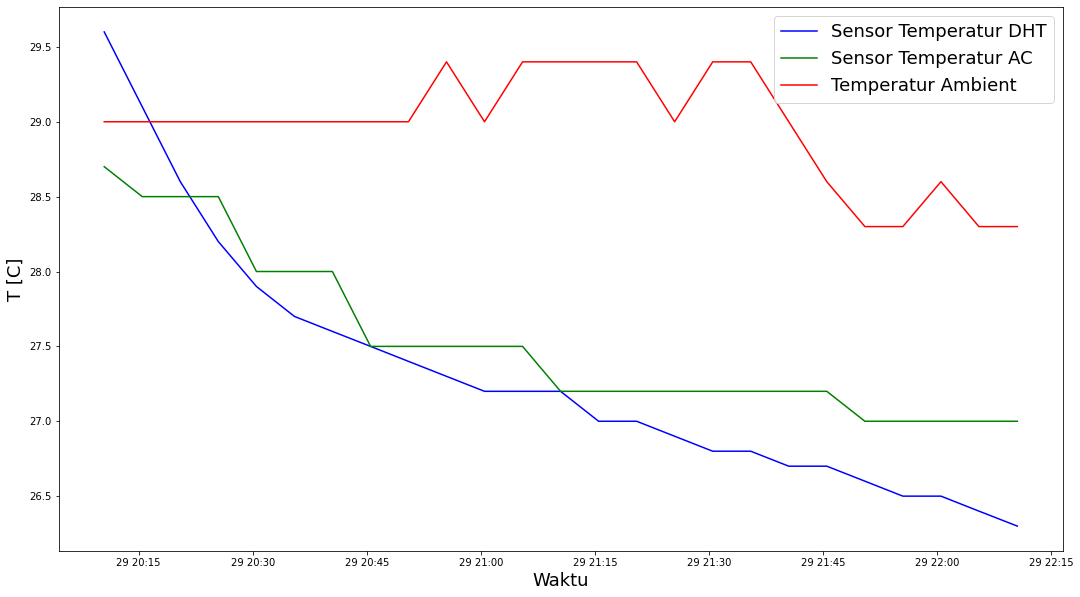

In [ ]:
plt.figure(figsize=(18,10))
plt.plot(df['roomTemperature'], color='blue')
plt.plot(df['roomTempAC'], color='green')
plt.plot(df['tempOutside'], color='red')
plt.legend(['Sensor Temperatur DHT','Sensor Temperatur AC', 'Temperatur Ambient'], loc ="upper right", fontsize=18)
# plt.title('Grafik temperatur sensor DHT, temperatur sensor AC, temperatur ambient', fontsize=22)
plt.xlabel('Waktu', fontsize=18)
plt.ylabel('T [C]', fontsize=18)
plt.show()

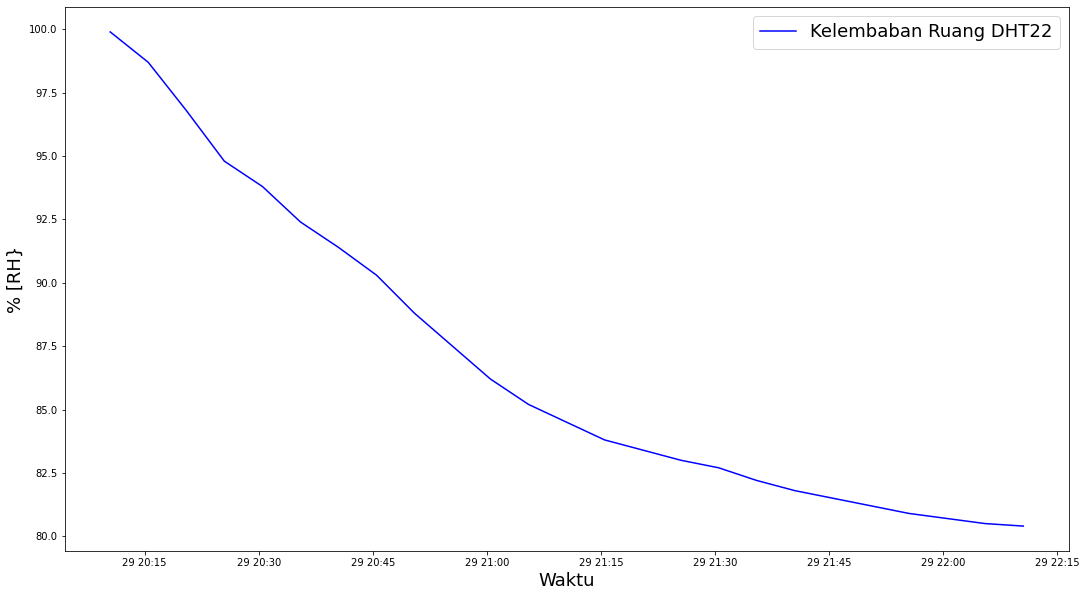

In [ ]:
plt.figure(figsize=(18,10))
plt.plot(df['roomHumidity'], color='blue')
plt.legend(['Kelembaban Ruang DHT22'], loc ="upper right", fontsize=18)
# plt.title('Grafik Pembacaan Nilai Kelembaban Sensor DHT22', fontsize=22)
plt.xlabel('Waktu', fontsize=18)
plt.ylabel('% [RH}', fontsize=18)
plt.show()